In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melb-data-example-12-06-2/melb_data.csv
/kaggle/input/wine-quality-example-12-06/winequality-red.csv


In [2]:
# Import needed libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import os
#Setting Style for Plotting
plt.style.use('fivethirtyeight')

In [3]:
# Connect to data from our dataset
# path to the Melbourne Houses dataset
melbourne_file_path = '/kaggle/input/melb-data-example-12-06-2/melb_data.csv'

# Create an object that will contain our dataset
melbourne_data = pd.read_csv(melbourne_file_path) 


In [4]:
# Watch a dataset description (baseic statistal parameters)
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [8]:
# Watch examles of data (by default 5 lines)
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [9]:
# Watch the name of columns
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
# take a dependence variable (price of real estate)
y = melbourne_data.Price

In [12]:
# take a variables by whom we would predict values of dependence variable 
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1.0,202.0,-37.7996,144.9984
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
3,3,2.0,94.0,-37.7969,144.9969
4,4,1.0,120.0,-37.8072,144.9941


In [14]:
# We take a predition model an fit it 
from sklearn.tree import DecisionTreeRegressor

# Define the module. Specify the number for random_state to ensure the same results every time you run the code
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit the model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [15]:
# Make a forecast of 5 houses
print("We make a forecast for the following 5 houses:")
print(X.head())
print("their price predictions are as follows:")
print(melbourne_model.predict(X.head()))

We make a forecast for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0      2       1.0     202.0   -37.7996    144.9984
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
3      3       2.0      94.0   -37.7969    144.9969
4      4       1.0     120.0   -37.8072    144.9941
their price predictions are as follows:
[1480000. 1035000. 1465000.  850000. 1600000.]


In [16]:
# Error calculating 
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1125.1804614629357

In [18]:
melbourne_features = ['Price','Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
df1 = melbourne_data[melbourne_features]

<Axes: >

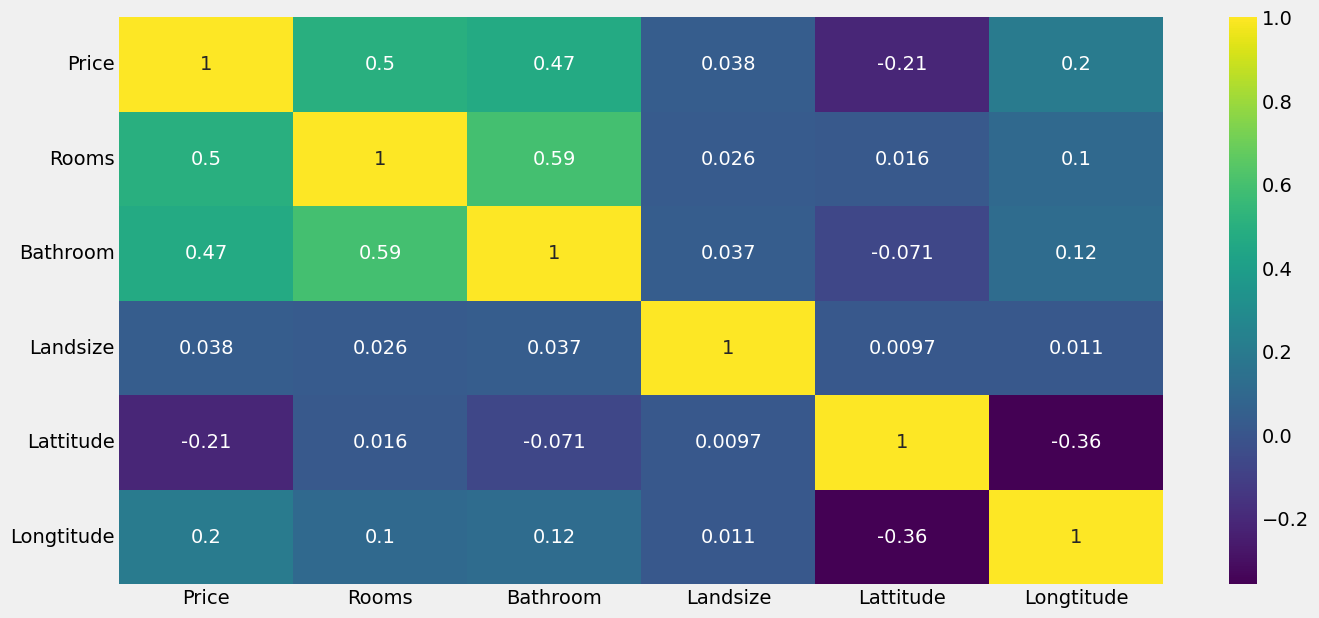

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df1.corr(),cmap='viridis', annot=True)

Create your own model of regression

Sequence of actions are:   

0. Mount your online disk. Import needed libraries.
1. Take a dataset
2. Watch structure of data set.
3. Take list of the names of columns.
4. Take only numeric variables to correlation analisys
5. Make the correlation analisys.
6. Choose the target variable. 
7. By Correlation analisys take 4-5 most fluent variables for target variable.
8. Create and fit the model.
9. Use the model for prediction.
10. Check absolute error.


In [7]:
# path to the Melbourne Houses dataset
file_path = '/kaggle/input/wine-quality-example-12-06/winequality-red.csv'

# Create an object that will contain our dataset
f_data = pd.read_csv(file_path,sep=';') 

In [8]:
f_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
f_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
f_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
f_data_numeric = f_data[features]

<Axes: >

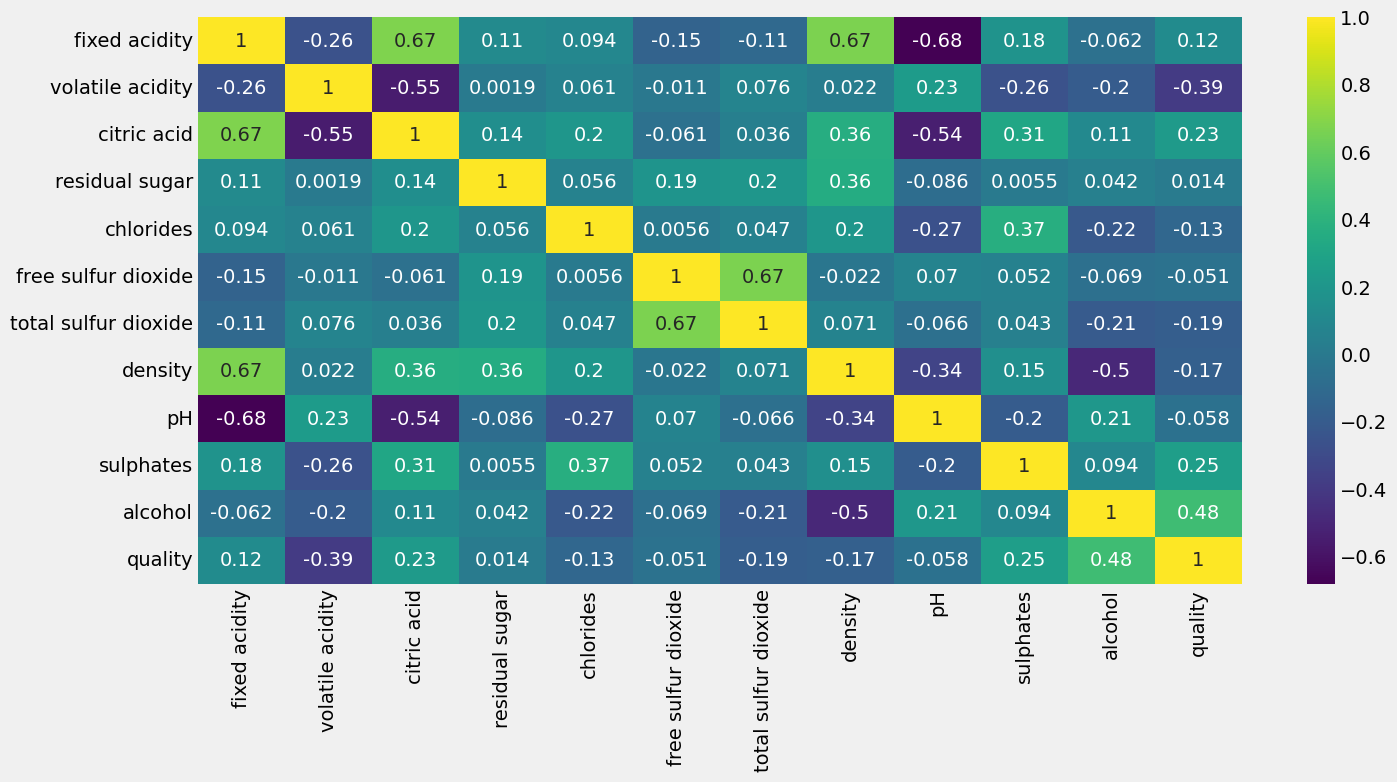

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(f_data_numeric.corr(),cmap='viridis', annot=True)

In [16]:
# Target variable is quality
Y = f_data_numeric.quality
fluent_features =['alcohol','sulphates','volatile acidity','citric acid']
X = f_data_numeric[fluent_features]

In [17]:
# We take a predition model an fit it 
from sklearn.tree import DecisionTreeRegressor

# Define the module. Specify the number for random_state to ensure the same results every time you run the code
model = DecisionTreeRegressor(random_state=1)

# Fit the model
model.fit(X, Y)

DecisionTreeRegressor(random_state=1)

In [18]:
# Make a forecast of 5 items
print("We make a forecast for the following 5 items:")
print(X.head())
print("their quality predictions are as follows:")
print(model.predict(X.head()))

We make a forecast for the following 5 items:
   alcohol  sulphates  volatile acidity  citric acid
0      9.4       0.56              0.70         0.00
1      9.8       0.68              0.88         0.00
2      9.8       0.65              0.76         0.04
3      9.8       0.58              0.28         0.56
4      9.4       0.56              0.70         0.00
their quality predictions are as follows:
[5. 5. 5. 6. 5.]


In [20]:
# Error calculating 
from sklearn.metrics import mean_absolute_error

predicted_quality = model.predict(X)
mean_absolute_error(Y, predicted_quality)

0.0006253908692933083

In [ ]:
I will send you new dataset.
And you would need do this actions.
And show me a result (screenshot or other report)

## Train and validating splits
Main problem to check real quality of model by errors is that we check its on the same data, that we use to fit model.

For more relevant check we are split data for 2 sub datasets: train and validate.

We would fit the model by train dataset and check on validation dataset.

In [28]:
from sklearn.model_selection import train_test_split

# Here we will split the data into training and test data: what for X and y
# The split is based on a random number generator.
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state = 0)

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

5000

In [24]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Average error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Average error:  0
Max leaf nodes: 50  		 Average error:  0
Max leaf nodes: 500  		 Average error:  0
Max leaf nodes: 5000  		 Average error:  0


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds)) #We calculate the average error

0.45360416666666664


## Addition example

In [32]:
import pandas as pd
path = '/kaggle/input/adult-income-14-06/adult.csv'
f_data = pd.read_csv(path)
f_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [38]:
import random
f_data = f_data.replace('<=50K', random.randint(30,50))
f_data = f_data.replace('>50K', random.randint(51,100))

In [39]:
f_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,44
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,44
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,87
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,87
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,44


In [40]:
f_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [43]:
fetures = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week','income']
f_data_num = f_data[fetures]

<Axes: >

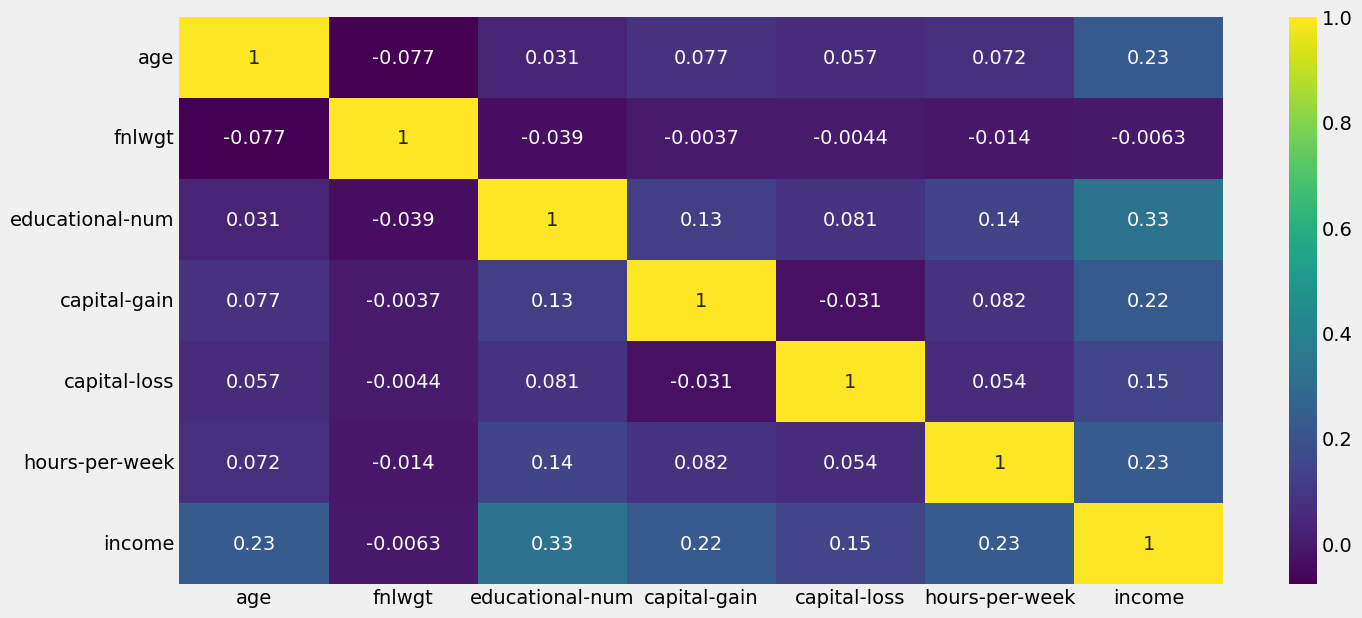

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(f_data_num.corr(),cmap='viridis', annot=True)

In [45]:
X_fetures = ['age','educational-num','capital-gain','hours-per-week']
X = f_data[X_fetures]

Y = f_data.income

In [48]:
from sklearn.model_selection import train_test_split

# Here we will split the data into training and test data: what for X and y
# The split is based on a random number generator.
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state = 0)

In [49]:
# We take a predition model an fit it 
from sklearn.tree import DecisionTreeRegressor

# Define the module. Specify the number for random_state to ensure the same results every time you run the code
model = DecisionTreeRegressor(random_state=1)

# Fit the model
model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [52]:
preds = model.predict(val_X)
print(mean_absolute_error(val_y, preds)) #We c

10.232023150850903
